# The Boston Qualifier Questionaire: Data Pipleline and Analysis

The Boston Marathon is one of the most popular races in world. Starting in 1897, the race has drawn elite and amateur runners every year to complete the infamous 26.2 miles. 

For runners of all skill levels, qualifing to enter the Boston Marathon is a major accomplishment that takes dedication to achieve. In 2019, the qualifying time for men aged 18-34 was 3hrs 00mins 08secs and for women was 3hrs 30mins 08secs. That's an average mile time of 6:53 and 8:01 respectively over the 26.2 miles. These times seem unimaginable for the non-runner, but these times are designed to be achievable for non-elite runners. The Boston Athletic Association aims to allow the top 5-10% of runners to qualify for the race. How much training is required to achieve a Boston Qualifing time?

The data for this analysis was obtained from miloandthecalf.com. For the past several years, the site has hosted a questionnaire for athletes that have qualified for the Boston for the first time. This will allow insight into the training habits required to qualify for the race.

First, I'll walk through the full pipeline used to clean the data. Then I'll show my analysis and visualizations of any findings.

## Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from pandas_profiling import ProfileReport
import numpy

In [2]:
df = pd.read_csv('bostonqual.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 20 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Name                                                                      376 non-null    object 
 1   Sex:                                                                      376 non-null    object 
 2   Age (at the time of first BQ):                                            376 non-null    float64
 3   Height (in inches):                                                       374 non-null    float64
 4   Weight (in lbs at the time of first BQ):                                  372 non-null    float64
 5   BMI                                                                       370 non-null    float64
 6   At which marathon did you get your first BQ?                      

All features will need to be renamed for convenience and some unneeded features will be removed. 

There are 376 total entries and most features contain nulls. Each feature will need to be analyzed to remove nulls and clean any inconsistent values. 

In [4]:
df = df.drop(['Name','Want to read more?'],axis=1)

In [5]:
df = df.rename(columns={'Sex:':'Sex',
                   'Age (at the time of first BQ):':'Age',
                   'Height (in inches):':'Height',
                   'Weight (in lbs at the time of first BQ):':'Weight',
                   'At which marathon did you get your first BQ? ':'First Marathon',
                   'How long had you been running when you ran your first BQ? ':'Years Running',
                   'Did you run in college or high school?':'School Running',
                   'What was your approximate lifetime mileage at the time of your first BQ?':'Lifetime Mileage',
                   'How many miles did you run in the year before your first BQ?':'Year Mileage',
                   'Approximately how many races did you run in that year?':'Amount of Races',
                   'Did you follow a canned program? ':'Running Program',
                   'Which one?':'Running Program Used',
                   'Did Speed work play a role?':'Speed Work',
                   'What kind?':'Speed Work Used',
                   'Did cross training play a role in your training? If so, how?':'Cross Training',
                   'What type of cross training':'Cross Training Used',
                   'Did you run with a running club or utilize a coach?':'Running Club or Coach'})

Next, we'll go through each feature to identify any issues with the data that need fixed.

#### Sex

In [6]:
df['Sex'] = df['Sex'].astype(str)

There are values entered upper and lower cased. Change these values to 'Male' and 'Female'.

In [8]:
df['Sex'].replace('m','M',inplace=True)
df['Sex'].replace('M','Male',inplace=True)
df['Sex'].replace('f','F',inplace=True)
df['Sex'].replace('F','Female',inplace=True)

#### Age

In [9]:
df['Age'] = df['Age'].astype(int)

#### BMI

In [14]:
df['BMI'] = df['BMI'].round()

In [16]:
df[df['BMI'] > 30]

,Sex,Age,Height,Weight,BMI,First Marathon,Years Running,School Running,Lifetime Mileage,Year Mileage,Amount of Races,Running Program,Running Program Used,Speed Work,Speed Work Used,Cross Training,Cross Training Used,Running Club or Coach
236,Male,24,38.0,145.0,71.0,Chicago,9,y,15000,2000,10.0,n,NaN,n,NaN,n,NaN,n
284,Male,48,61.0,175.0,33.0,RNR DC,3,y,NaN,NaN,2.0,n,NaN,y,tempo,y,NaN,y


These two BMIs are suspiciously high. When looking at the full data, it's due low heights and more average weights. When double checking these two rows against the source website, the heights are in fact incorrect. These are the only two points in the dataset that were found to have been incorrect.

We'll fix these two entries with the correct height values and corresponding BMI.

In [17]:
df.loc[236,'Height'] = 68
df.loc[236,'BMI'] = 22
df.loc[284,'Height'] = 73
df.loc[284,'BMI'] = 23

#### First Marathon

In [19]:
df['First Marathon'] = df['First Marathon'].astype(str)

In [20]:
df['First Marathon'].nunique()

210

There are 210 unique values for first marathon that need to be cleaned to be consistant and standard.

This can be done in the future if the information is desired.

#### Years Running

In [21]:
df['Years Running'].unique()

array(['17', '11', '7', '4', '2', '24', '14', nan, '9', '1.5', '1',
       'on and off for years', '10', '34', '0.5', '18', '20', '6', '3',
       '12', '13', '6.5', '44', '15', '5.5', '2.8', '5', '23', '25', '8',
       'less than a year', '1.8', '22', '30', '3.5', '21', '2.75', '19',
       '2.5', '38', '0.75', '7.5', '2.2', '40', '16', '42', '35', '1.3',
       '4.5', '2.3', '37', '8.5', '9 months', '0.9', '26'], dtype=object)

Change values that aren't numbers and round.

In [22]:
df['Years Running'] = df['Years Running'].replace({'on and off for years':'','9 months':'1','less than a year':'1'})
df['Years Running'] = pd.to_numeric(df['Years Running'])
df['Years Running'] = df['Years Running'].round()

Similar to 'Sex' feature, this has upper and lower case values. Change all values to True or False. 

In [24]:
df['School Running'] = df['School Running'].replace({'n':False,'y':True,'Y':True})

#### Lifetime Mileage

In [25]:
df['Lifetime Mileage'].unique()

array([nan, '5000', '6000', '2500', '15000', '18,000', 'thousand of kms',
       '2600', '4000', '2000', '500', '7598.6', '10000', '800', '400',
       '9000', '3000', '2200', '8,000', '15,000', '10,000', '4500',
       '13000', '7500', '?', '21000', '92000', '30000', '2298', '3465',
       '2579', '8000', '7600', '2,500', '20000', '3500', '2340', '1500',
       '13500', '3700', '12000', '40000', '6305', '5500', '5963', '5281',
       '6440', '9500', '3473', '2790', '16000', '4300', '5,000', '7000',
       '6118', '4,000', '7550', '30,000', '22,000', '8500', '1400', '300',
       '16820', '1200', '24220', '17000', '28000', '18500', '1600',
       '21840', '1000', '10500', '8700', '50000', '45000', '5300',
       '25000', '6500', '14000', '2800', '40,000', '2300', '2485', '3728',
       '6400', '11000', '14900', '9360', '5600', '10200', '6600', '2100',
       '2700', '4660', '1100', '3706', '7800', '23000', '5800', '9320',
       '38000', '12500', '1800', '22000', '20043'], dtype=object

Change any non-numbers, remove any commas, and round.

In [26]:
df['Lifetime Mileage'] = df['Lifetime Mileage'].replace({'?':'','thousand of kms':''})
df['Lifetime Mileage'] = df['Lifetime Mileage'].replace(',','',regex=True)
df['Lifetime Mileage'] = pd.to_numeric(df['Lifetime Mileage'])
df['Lifetime Mileage'] = df['Lifetime Mileage'].round()

#### Year Mileage

In [28]:
df['Year Mileage'].unique()

array(['2740', nan, '800', '2100', '1250', '1000', '2150',
       '"couple of thousand kms"', '1200', '1300', '1500', '682', '300',
       '3088.8', '1629', '400', '900', '2000', '1313', '450', '28',
       '1750', '2800', '1400', '500', '3000', '2080', '1800', '1262',
       '1172', '2500', '1942', '2385', '1016', '3500', '1700', '4200',
       '3200', '2700', '2340', '1730', '550', '3640', '2372', '1129',
       '3100', '745', '2085', '1171', '1722', '1350', '2200', '950',
       '2272', '1761', '2300', '750', '1600', '2650', '14000', '2037',
       '2900', '1484', '1102', '1972', '700', '1997', '3400', '0', '3800',
       '1150', '1560', '1379', '2057', '2600', '3700', '5000', '3650',
       '1382', '1900', '600', '2845', '3120', '2400', '4000', '1568',
       '1168', '1100', '1614', '1180', '425', '960', '1003', '1470',
       '1864', '1870', '2059', '1436', '2835', '1162', '1739', '1450',
       '1185', '2112', '876'], dtype=object)

Change any non-numbers and round.

In [29]:
df['Year Mileage'] = df['Year Mileage'].replace('"couple of thousand kms"','')
df['Year Mileage'] = pd.to_numeric(df['Year Mileage'])
df['Year Mileage'] = df['Year Mileage'].round()

In [31]:
df['Year Mileage'].max()

14000.0

In [32]:
df[df['Year Mileage'] == 14000]

,Sex,Age,Height,Weight,BMI,First Marathon,Years Running,School Running,Lifetime Mileage,Year Mileage,Amount of Races,Running Program,Running Program Used,Speed Work,Speed Work Used,Cross Training,Cross Training Used,Running Club or Coach
129,Male,28,72.0,165.0,22.0,Carolina Marathon 1990,14.0,True,30000.0,14000.0,10.0,n,NaN,y,"fartleks, track work, hill",y,"cycling, swimming",n


That's a lot of miles in one year! Checking this data point against the original site data, this is another error. This should actually be 1400. 

In [33]:
df.loc[129,'Year Mileage'] = 1400

#### Amount of Races

In [35]:
df['Amount of Races'].max()

2300.0

This can't be possible. Can't confirm what the actual value should be, so this point will be changed to null.

In [36]:
df['Amount of Races'] = df['Amount of Races'].replace(2300.0,None)

#### Running Program

In [37]:
df['Running Program'] = df['Running Program'].replace({'y':True,'n':False,'Y':True})

#### Running Program Used

In [38]:
df['Running Program Used'].unique()

array(["Mcmillan's You (but faster)", nan, 'Hal Higdon Advanced',
       'hal higdon', 'my asics online', 'Pfitzinger 55/18',
       'hal higdon advanced 1', 'hansons', 'hal higdon advanced',
       'run less run faster', 'mcmillian', 'Run Less Run Faster', 'FIRST',
       'Pfitzinger 55/85', 'nike+', 'Hal Higdon Intermediate 2',
       "runner's world smart coach",
       '"I Don\'t Know What The Fuck I\'m Doing But I Love Running."',
       'NYRR Advanced A', ' FIRST', 'Pftizinger 18/55',
       "Customized Jack Daniel's RunSMART.com", 'n', 'BAA', 'pftiz',
       'pfitz 18/70', 'run less, run faster', 'Hanson Advanced',
       'pftizinger 18/55', 'Pfitzinger 18/70', 'Pfitzinger 18/55',
       'pfitzinger 18/55', 'garmin intermediate ',
       'baystate program by John Barbour', 'Hansons', 'Hal Higdon',
       'pfitzinger 18/70', 'Jack Daneis 2Q', 'pfitzinger 55',
       "hanson's advanced", 'pfitzinger 18/85',
       'faster from 5k to marathon', 'runners world', 'Hanson', 'higdons',

There's many different programs entered here that are spelled or submitted differently and will need a lot of cleaning to standardize. 

We'll create a two new dataframes for analyzing running programs. 

In [39]:
run_program_df = pd.DataFrame(data=df['Running Program Used'])
run_program_df = run_program_df.dropna()
run_program_df.reset_index(drop=True,inplace=True)

In [40]:
total = df['Running Program Used'].size
with_program = run_program_df.size
without_program = total - with_program

In [41]:
program_used = pd.DataFrame(data={'Used Program':[with_program,with_program/total],
                                  'No Program':[without_program,without_program/total]})
program_used.index = ['Total','Percent of Total']

In [42]:
program_used.round(2)


,Used Program,No Program
Total,113.0,263.0
Percent of Total,0.3,0.7


In [43]:
run_program_df['Running Program Used'] = run_program_df['Running Program Used'].str.lower()

Change any values that won't be picked up and changed by the pipeline.

In [44]:
run_program_df['Running Program Used'].replace({'pftizinger 18/55':'pfitz','pftiz':'pfitz','hal hidgon intermediate 2':'higdon',
                                                'run less run faster':'first','run less, run faster':'first',
                                                'faster from 5k to marathon':'Hudson',
                                                "runner's world smart coach":'Runners World Smart Coach',
                                                'runners world':'Runners World Smart Coach','rw run smart':'jack',
                                                ' run with power':'run with power','ha;h hogdon':'higdon'},
                                               inplace=True)

This list of tuples links possible words contained in the data values that will be changed to a new consistent value.

In [45]:
program_tup_list = [('Nike','nike'),('McMillan','mcmillan'),('McMillan','mcmillian'),('Hal Higdon','higdon'),('Hanson','hanson'),
                ('Pfitzinger','pfitz'),('MY ASICS','asic'),('NY Road Runners','nyrr'),('Boston Athletic Association','baa'),
                ('Jack Daniels','jack'),('FIRST','first'),
                ('Garmin','garmin'),('Baystate Run Program','baystate'),('Cool Running','cool'),('Howard Nippert','nippert'),
                ('Lydiard','lydiard'),('Track Shack','shack'),('Run with Power','run with power'),('Revel Race Series','revel'),
                ("Glover's",'glover')]

Clean data.

In [46]:
for i,j in program_tup_list:
    run_program_df['Running Program Used'] = run_program_df['Running Program Used'].apply(lambda x: i if j in x else x)

In [47]:
program_list = [sub[0] for sub in program_tup_list]

In [48]:
run_program_df['Running Program Used'] = run_program_df[run_program_df['Running Program Used'].isin(program_list)]

In [49]:
run_program_df['Running Program Used'].dropna(inplace=True)

#### Speed Work

In [51]:
df['Speed Work'] = df['Speed Work'].replace({'y':True,'Y':True,'n':False,'N':False})

#### Speed Work Used 

In [52]:
df['Speed Work Used'].unique()

array(['tempo, intervals', 'two speed workouts a week', nan,
       'tempo runs, marathon pace', 'mile repeats', 'progressive',
       'yasso 800s', 'tempo', 'tempo, fartleks, intervals',
       'lactate threshold', 'mile repeats; 800m repeats',
       'vo2max; 6x600 at 5k pace', 'hills, long runs', 'hills',
       'tempo, mile repeats', 'intervals', 'marathon pace',
       'intervals, tempo', 'hills, fartleks',
       'intervals, fartleks, hills', 'track workouts',
       'intervals, fartleks', 'track intervals', 'tempo MP long runs',
       'Marathon pace', "plan's workout", 'intervals weekly',
       'marathon pace runs', 'tempo, hills, intervals',
       'tempo runs, intervals', 'speed work, tempo run, ',
       'tempo, track work, hills', 'track work, tempo', '400 repeats',
       'weekly workout of 800, 1 mile, 1.5 mile, or 2 mile repeats',
       'tempo, fartlek', '800s, tempo, mile repeats',
       'lactate threshold workouts', 'fartleks, 800m repeats',
       'Intervals', 'int

In [53]:
speed_work_df = pd.DataFrame(data=df['Speed Work Used'])
speed_work_df = speed_work_df.dropna()
speed_work_df = speed_work_df.reset_index(drop=True)

In [54]:
speed_total = df['Speed Work Used'].size
speed_with_program = speed_work_df.size
speed_without_program = speed_total - speed_with_program

In [55]:
speed_program_used = pd.DataFrame(data={'Used Speed Work':[speed_with_program,speed_with_program/speed_total],
                                  'No Speed Work':[speed_without_program,speed_without_program/speed_total]})
speed_program_used.index = ['Total','Percent of Total']

In [56]:
speed_program_used.round(1)

,Used Speed Work,No Speed Work
Total,210.0,166.0
Percent of Total,0.6,0.4


Similar data clean to the 'Running Program Used' feature will be used here in the future to classify each type of workout used by each person. The difference will be adding a column for each speed work used as dummy variables in order to assign multiple workouts to each row. 

In [57]:
speed_work_df['Speed Work Used'] = speed_work_df['Speed Work Used'].str.lower()

In [58]:
speed_tup_list = [('Mile Repeats','mile'),
                  ('Tempo Runs','tempo'),
                  ('800m Repeats','800'),
                  ('Marathon Pace','marathon'),
                  ('Yasso 800s','yasso'),
                  ('Fartleks','fartlek'),
                  ('Hill Repeats','hill'),
                  ('400m Repeats','400'),
                  ('Lactate Threshold','threshold'),
                  ('Intervals',('interval','v02 max'))]

In [59]:
for j,k in speed_tup_list:
    speed_work_df[j] = False
    for i in range(len(speed_work_df['Speed Work Used'])-1):
        
        if type(k) == str:
            if k in speed_work_df['Speed Work Used'][i]:
                speed_work_df[j][i] = True
                
        else:
            for x in k:
                if x in speed_work_df['Speed Work Used'][i]:
                    speed_work_df[j][i] = True

/Users/colinpierce/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/colinpierce/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [61]:
speed_list = []
for i in speed_work_df.columns:
    speed_list.append(i)

In [62]:
sum_speed_list = []
speed_list = speed_list[1:]

for i in speed_list:
    sum_speed_list.append(speed_work_df[i].sum())

In [63]:
speed_sum_df = pd.DataFrame(list(zip(speed_list,sum_speed_list)),columns=['Speed Work','Sum']).sort_values(by='Sum',ascending=False)

#### Cross Training

In [65]:
df['Cross Training'] = df['Cross Training'].replace({'y':True,'Y':True,'n':False,'N':False})

#### Cross Training Used

In [66]:
df['Cross Training Used'].unique()

array(['swimming, core, ', 'rock climbing', 'spin class', nan, 'cycling',
       'weights, aerobics', 'bodyweight', 'swimming, biking',
       'strength training', 'swimming, cycling',
       'aerobics and zumba classes', 'swimming, erg, spin class', 'core',
       'weights, eliptical', 'cycling, swimming',
       'spin class; strength training', 'weight training, cycling',
       'swimming, lifting', 'bootcamp',
       'aerobic classes, strength training', 'cross country skiing',
       'some swimming and biking', 'soccer; rock climbing', 'weights',
       'increased flexibility, range of motion and core, adductor, illiopsoas strength.',
       'yoga', 'strength', 'weight lifting', 'crossfit',
       'cycling, weights, core', 'cycling, weights', 'bodyweight circuit',
       'aerobics', 'trx', 'core, weights', 'core, cycling',
       'weights, cycling', 'mountain biking', 'weights, core',
       'core, swimming, cycling', 'rowing, biking, swimming',
       'swimming, stationary bike', 

In [67]:
cross_training_df = pd.DataFrame(data=df['Cross Training Used'])
cross_training_df = cross_training_df.dropna()
cross_training_df = cross_training_df.reset_index(drop=True)

In [68]:
cross_total = df['Cross Training Used'].size
cross_with = cross_training_df.size
cross_without = cross_total - cross_with

In [69]:
cross_training_used = pd.DataFrame(data={'Used Cross Training':[cross_with,cross_with/cross_total],
                                  'No Cross Training':[cross_without,cross_without/cross_total]})
cross_training_used.index = ['Total','Percent of Total']

In [70]:
cross_training_used.round(1)

,Used Cross Training,No Cross Training
Total,164.0,212.0
Percent of Total,0.4,0.6


In order to clean the Cross Training Used to analyze which activites were used, we'll create a new dataset that will have dummy features to indicate each activity that is used by each row. This allows multiple activities to be indicated.

In [71]:
cross_training_df['Cross Training Used'] = cross_training_df['Cross Training Used'].str.lower()

Tuple list containing each activity we will be identifing from the data.

In [72]:
cross_tup_list = [('Swimming','swim'),
                  ('Strength Training',('core','lift','crossfit','weights','weight','trx','erg','row')),
                  ('Rock Climbing','climb'),
                  ('Cycling',('spin','biking','cycling','eliptical','bike')),
                  ('Aerobics',('aerobic','pool')),
                  ('Skiing','ski'),
                  ('Soccer','soccer'),
                  ('Yoga','yoga'),
                  ('Pilates','pilates'),
                  ('MMA','mma'),
                  ('Basketball','basketball'),
                  ('Hockey','hockey'),
                  ('Boot Camp','bootcamp')]

Apply tuple list to the cross training dataframe to populate with True or False for each activity.

In [73]:
for j,k in cross_tup_list:
    cross_training_df[j] = False
    for i in range(len(cross_training_df['Cross Training Used'])-1):
        
        if type(k) == str:
            if k in cross_training_df['Cross Training Used'][i]:
                cross_training_df[j][i] = True
                
        else:
            for x in k:
                if x in cross_training_df['Cross Training Used'][i]:
                    cross_training_df[j][i] = True

/Users/colinpierce/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/colinpierce/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Create a new dataframe to count each activity.

In [75]:
cross_list = []
for i in cross_training_df.columns:
    cross_list.append(i)

In [76]:
sum_list = []
cross_list = cross_list[1:]

for i in cross_list:
    sum_list.append(cross_training_df[i].sum())

In [77]:
cross_sum_df = pd.DataFrame(list(zip(cross_list,sum_list)),columns=['Cross Training','Sum']).sort_values(by='Sum',ascending=False)

#### Running Club or Coach

In [79]:
df['Running Club or Coach'] = df['Running Club or Coach'].replace({'n':False,'N':False,'y':True,'Y':True})

## Analysis

### Physical Characteristics

#### Gender

<AxesSubplot:xlabel='Sex', ylabel='count'>

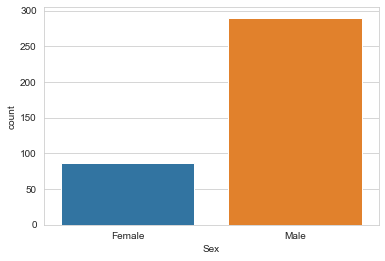

In [80]:
sns.countplot(data=df,x='Sex')

In [81]:
male_count = df[df['Sex'] == 'Male']['Sex'].count().round(0)
male_per = male_count / df['Sex'].size
female_count = df[df['Sex'] == 'Female']['Sex'].count()
female_per = female_count / df['Sex'].size

sex_df = pd.DataFrame(data={'':['Total','Percent'],'Male':[male_count,male_per],'Female':[female_count,female_per]})

In [82]:
sex_df

,,Male,Female
0,Total,290.000000,86.000000
1,Percent,0.771277,0.228723


#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

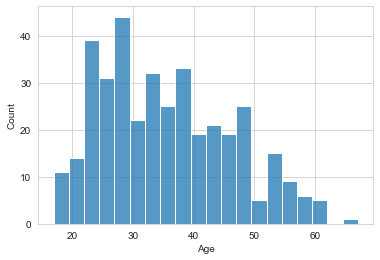

In [83]:
sns.histplot(data=df,x='Age',bins=20)

#### Height

<AxesSubplot:xlabel='Height', ylabel='Weight'>

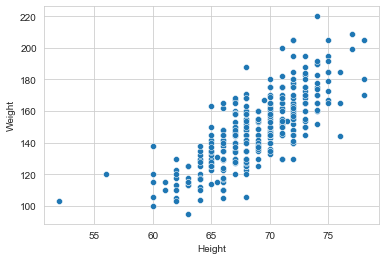

In [84]:
sns.scatterplot(data=df,x='Height',y='Weight')

<AxesSubplot:xlabel='BMI', ylabel='Height'>

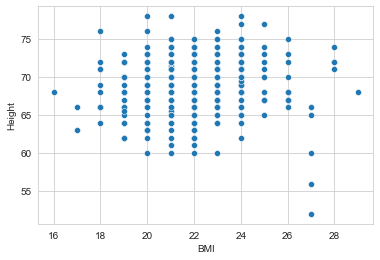

In [85]:
sns.scatterplot(data=df,x='BMI',y='Height')

<AxesSubplot:xlabel='BMI', ylabel='Weight'>

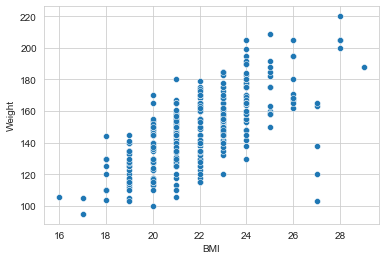

In [86]:
sns.scatterplot(data=df,x='BMI',y='Weight')

### Training

#### Years Running

<AxesSubplot:xlabel='Years Running', ylabel='Count'>

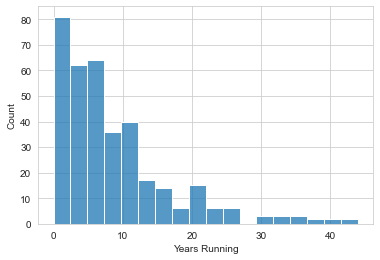

In [88]:
sns.histplot(data=df,x='Years Running')

<AxesSubplot:xlabel='Years Running', ylabel='Count'>

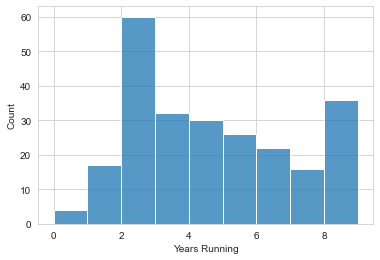

In [89]:
sns.histplot(data=df[df['Years Running']<10],x='Years Running')

#### Lifetime Mileage

<AxesSubplot:xlabel='Lifetime Mileage', ylabel='Count'>

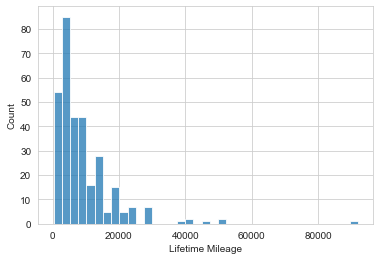

In [90]:
sns.histplot(data=df,x='Lifetime Mileage')

<AxesSubplot:xlabel='Lifetime Mileage', ylabel='Count'>

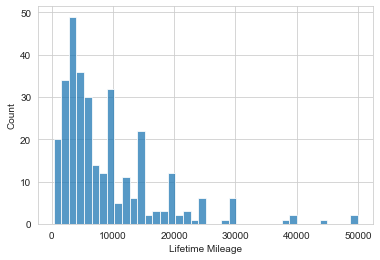

In [110]:
sns.histplot(data=df[df['Lifetime Mileage'] < 60000],x='Lifetime Mileage',bins = 40)

<AxesSubplot:xlabel='Lifetime Mileage', ylabel='Years Running'>

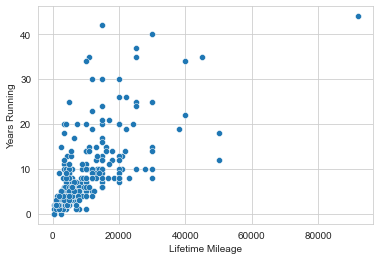

In [91]:
sns.scatterplot(data=df,x='Lifetime Mileage',y='Years Running')

<AxesSubplot:xlabel='Lifetime Mileage', ylabel='Years Running'>

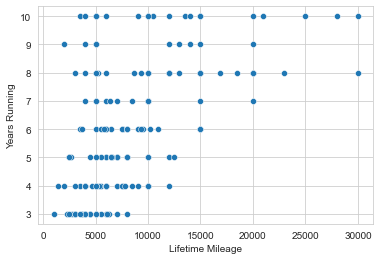

In [92]:
sns.scatterplot(data=df[(df['Years Running'] >= 3) & (df['Years Running'] <= 10)],x='Lifetime Mileage',y='Years Running')

#### Year Mileage

<AxesSubplot:xlabel='Year Mileage', ylabel='Count'>

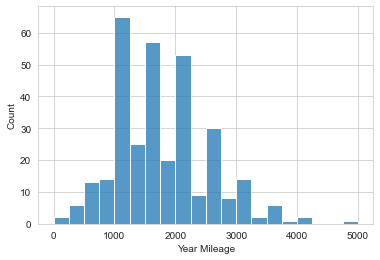

In [111]:
sns.histplot(data=df,x='Year Mileage',bins=20)

#### Amount of Races

<AxesSubplot:xlabel='Amount of Races', ylabel='Count'>

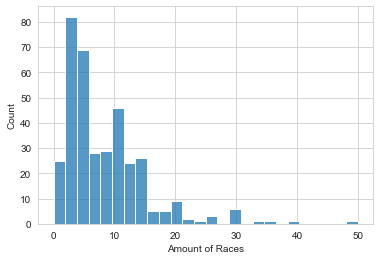

In [94]:
sns.histplot(data=df,x='Amount of Races')

#### Running Program

<AxesSubplot:xlabel='Running Program', ylabel='count'>

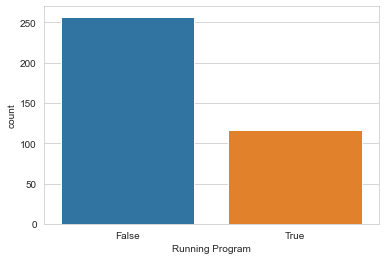

In [95]:
sns.countplot(data=df,x='Running Program')

<AxesSubplot:xlabel='Running Program Used', ylabel='count'>

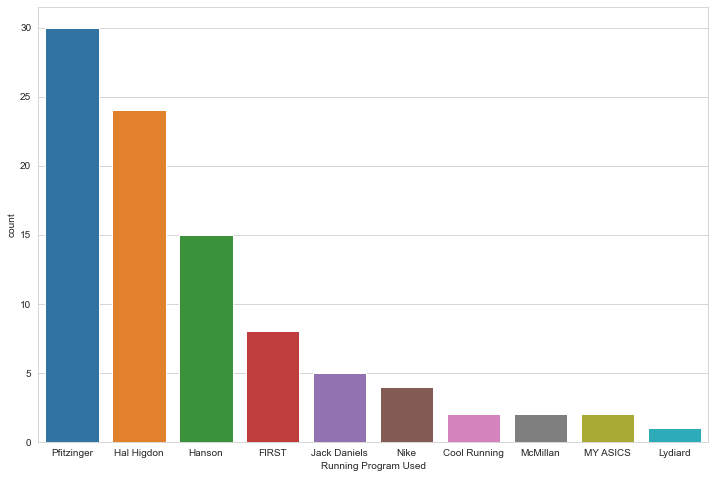

In [96]:
plt.figure(figsize=(12,8))
sns.countplot(data=run_program_df,x='Running Program Used',order=run_program_df['Running Program Used'].value_counts().iloc[:10].index)

#### Speed Work

<AxesSubplot:xlabel='Speed Work', ylabel='count'>

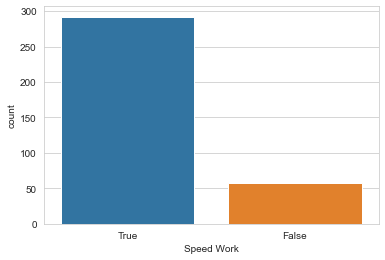

In [97]:
sns.countplot(data=df,x='Speed Work')

<AxesSubplot:xlabel='Speed Work', ylabel='Sum'>

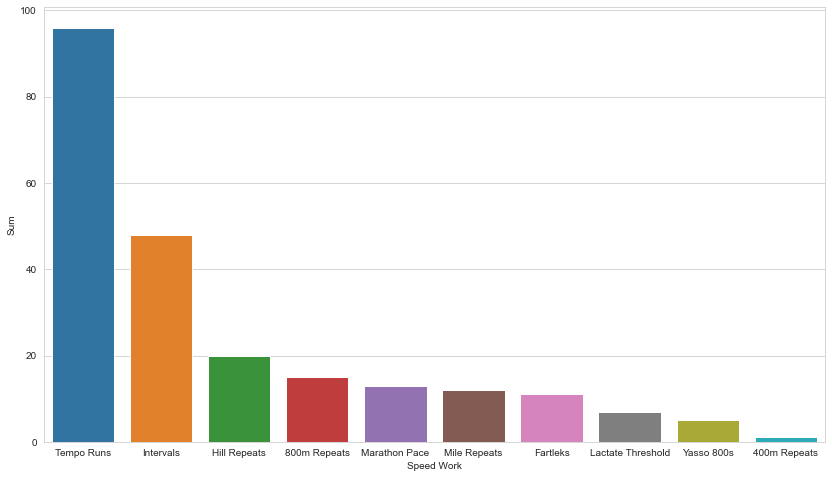

In [98]:
plt.figure(figsize=(14,8))
sns.barplot(data=speed_sum_df,x='Speed Work',y='Sum',order=speed_sum_df['Speed Work'])

#### Cross Training

<AxesSubplot:xlabel='Cross Training', ylabel='count'>

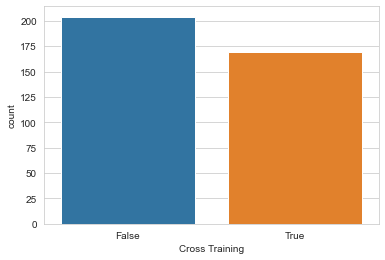

In [99]:
sns.countplot(data=df,x='Cross Training')

<AxesSubplot:xlabel='Cross Training', ylabel='Sum'>

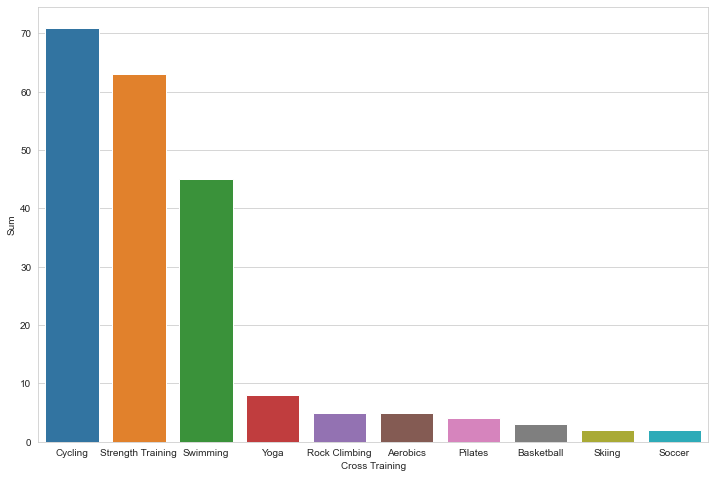

In [100]:
plt.figure(figsize=(12,8))
sns.barplot(data=cross_sum_df,x='Cross Training',y='Sum',order=cross_sum_df['Cross Training'].iloc[:10])

#### Running Club or Coach

<AxesSubplot:xlabel='Running Club or Coach', ylabel='count'>

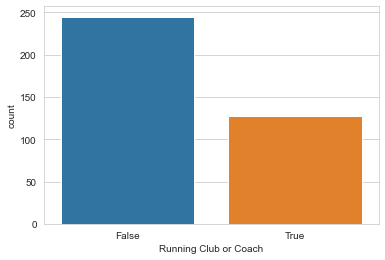

In [101]:
sns.countplot(data=df,x='Running Club or Coach')